<img src="./assets/img/teclab_logo.png" alt="Teclab logo" width="170">

**Author**: Hector Vergara ([LinkedIn](https://www.linkedin.com/in/hector-vergara/))

**Repository**: [nlp_apis](https://github.com/hhvergara/nlp_apis)

**Python Notebook**: [API2.ipynb](https://github.com/hhvergara/nlp_apis/blob/main/API2.ipynb)

----

# API 2:

### Contexto

La gerencia general ha aprobado el proyecto de la célula Data Science para el análisis de sentimientos, por lo que ahora tiene que iniciar el preprocesamiento de texto.

Todo el equipo está muy motivado en poner manos a la obra, ya que es la oportunidad de poner en práctica lo aprendido.

Las primeras tareas que se van a realizar son: tokenización, limpieza y reducción del vocabulario.

### Consignas

1.	Importación de librerías. Se realizará una segunda parte del análisis, a la cual vamos a llamar “Preprocesamiento de datos”. Primero vamos a importar todas las librerías que vamos a usar en el análisis, las que consideremos necesarias.

2.	Limpieza, tokenización y reducción del vocabulario.

    a. Se definirá una función similar a la vista en los ejemplos, pero debemos personalizarla, en otras palabras, no copiar los ejemplos textualmente, solo basarnos en ellos. En la misma función, podemos realizar la tokenización y limpieza, o se pueden crear dos funciones por separado; lo importante es que especifiquemos dónde aplicamos la tokenización y la realicemos con RegexpTokenizer. Para ello, se debe usar como parámetro el patrón de expresión regular que se diseñó en la consigna 4 de la actividad anterior.

    b. Se codificará una función para lematización y otra para stemming, que lea el corpus de los comentarios, y entregue el corpus reducido a lemas y raíces respectivamente. Debemos basarnos en los ejemplos, pero no debemos copiarlos textualmente.

3.	Split de la muestra. Realizaremos la división de la muestra en entrenamiento y test, utilizando el método train_test_split de la librería sklearn. Se destinará el 20 % de muestra para el test y el 80 % para el entrenamiento.

4.	Distribución del target según muestra, train y test. Realizaremos un diagrama de barras de los porcentajes del target (bueno, malo, o info) según muestra train y test. Las distribuciones pueden no salir tan similares, debido a que la muestra test tiene baja materialidad. Lo importante es que por lo menos se mantenga el orden.


In [ ]:
# 1. Importar librerias.
import os
import nltk
import numpy as np
import pandas as pd
from pathlib import Path
from nltk import pos_tag
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from  nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer, PorterStemmer

__version__ = '0.0.1'
__email__ = 'hhvservice@gmail.com'
__author__ = 'Hector Vergara'
__annotations__ = 'https://www.linkedin.com/in/hector-vergara/'
__base_dir__ = Path().absolute()
__data_dir__ = os.path.join(__base_dir__, 'data')
filename_data = os.path.join(__data_dir__, 'sentiment_analysis_dataset.csv')

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hvergara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hvergara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hvergara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hvergara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/hvergara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hvergara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## ✅ 2-A. Limpieza, tokenización y reducción del vocabulario.

Se definirá una función similar a la vista en los ejemplos, pero debemos personalizarla, en otras palabras, no copiar los ejemplos textualmente, solo basarnos en ellos.

En la misma función, podemos realizar la tokenización y limpieza, o se pueden crear dos funciones por separado; lo importante es que especifiquemos dónde aplicamos la tokenización y la realicemos con RegexpTokenizer.

Para ello, se debe usar como parámetro el patrón de expresión regular que se diseñó en la consigna 4 de la actividad anterior.

In [118]:
def clean_tokenize_text(text: str) -> list:
    """ Tokenizes text and removes emojis, emoticons, and special characters."""
    pattern = (
        r'[\U0001F600-\U0001F64F]'          # classic emojis
        r'|[\U0001F300-\U0001F5FF]'         # nature, symbols
        r'|[\U0001F680-\U0001F6FF]'         # transport
        r'|[\U0001F1E0-\U0001F1FF]'         # Flags
        r'|[\U00002700-\U000027BF]'         # various symbols
        r'|[\U0001F900-\U0001F9FF]'         # gestures
        r'|[\U00002600-\U000026FF]'         # ☀☂
        r'|❤|🥰'                            # specific emojis
        r'|:\)'                             # emoticon :)
        r'|\b\w+\b'                         # words (alphanumeric)
    )
    tokenizer = RegexpTokenizer(pattern)
    return tokenizer.tokenize(text.lower())

# Example of using the clean_tokenize_text function
text = "The children were running quickly through the park, happy 🥰 :)"
tokens = clean_tokenize_text(text)
print("Tokens:", tokens)


Tokens: ['the', 'children', 'were', 'running', 'quickly', 'through', 'the', 'park', 'happy', '🥰', ':)']


## ✅ 2-B. Lematización y Stemming.

Se codificará una función para lematización y otra para stemming, que lea el corpus de los comentarios, y entregue el corpus reducido a lemas y raíces respectivamente. Debemos basarnos en los ejemplos, pero no debemos copiarlos textualmente.

In [119]:
def get_wordnet_pos(treebank_tag) -> str:
    """
    Converts nltk (Treebank) POS tags to WordNet tags.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # By default, use NOUN if no match found


def lemmatize_tokens(tokens: list) -> list:
    """Lemmatize tokens using POS tagging for greater accuracy."""
    lemmatizer = WordNetLemmatizer()
    pos_tags = pos_tag(tokens)  # [('los', 'DT'), ('niños', 'NNS'), ...]
    return [
        lemmatizer.lemmatize(token, get_wordnet_pos(pos))
        for token, pos in pos_tags
    ]


def stem_tokens(tokens: list) -> list:
    """Stem tokens using PorterStemmer."""
    stemmer = PorterStemmer().stem
    return [stemmer(token) for token in tokens]


# Example usage:
tokens = clean_tokenize_text(text)

print("Tokens:", tokens)
print("Lemas:", lemmatize_tokens(tokens))
print("Raíces:", stem_tokens(tokens))

Tokens: ['the', 'children', 'were', 'running', 'quickly', 'through', 'the', 'park', 'happy', '🥰', ':)']
Lemas: ['the', 'child', 'be', 'run', 'quickly', 'through', 'the', 'park', 'happy', '🥰', ':)']
Raíces: ['the', 'children', 'were', 'run', 'quickli', 'through', 'the', 'park', 'happi', '🥰', ':)']


> ⚠️ Nota: El lematizador utilizado (WordNetLemmatizer de NLTK) funciona solamente con palabras en inglés, ya que utiliza el corpus WordNet. Por lo tanto, para este ejemplo se usó un texto en inglés. En aplicaciones reales en español, se recomienda utilizar lematizadores como spaCy o Stanza entrenados en ese idioma.


### Descargamos el dataset "sentiment-analysis-dataset" de kaggle para realizar las pruebas.

Referencia: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data

In [120]:
# Load the dataset
df = pd.read_csv(filename_data, sep=',', encoding='unicode_escape')
df.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [121]:
print(f'''
Cantidad de filas: {df.shape[0]}
Cantidad de columnas: {df.shape[1]}
''')


Cantidad de filas: 27481
Cantidad de columnas: 10



In [122]:
# Apply text processing functions:
df['tokens'] = df['text'].astype(str).apply(clean_tokenize_text)
df['lemmas'] = df['tokens'].apply(lemmatize_tokens)
df['stems'] = df['tokens'].apply(stem_tokens)
df.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),tokens,lemmas,stems
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"[i, d, have, responded, if, i, were, going]","[i, d, have, respond, if, i, be, go]","[i, d, have, respond, if, i, were, go]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,"[my, boss, is, bullying, me]","[my, bos, be, bully, me]","[my, boss, is, bulli, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,"[what, interview, leave, me, alone]","[what, interview, leave, me, alone]","[what, interview, leav, me, alon]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"[sons, of, why, couldn, t, they, put, them, on...","[son, of, why, couldn, t, they, put, them, on,...","[son, of, whi, couldn, t, they, put, them, on,..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223,"[http, www, dothebouncy, com, smf, some, shame...","[http, www, dothebouncy, com, smf, some, shame...","[http, www, dothebounci, com, smf, some, shame..."
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17,"[2am, feedings, for, the, baby, are, fun, when...","[2am, feeding, for, the, baby, be, fun, when, ...","[2am, feed, for, the, babi, are, fun, when, he..."
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104,"[soooo, high]","[soooo, high]","[soooo, high]"
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3,"[both, of, you]","[both, of, you]","[both, of, you]"
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109,"[journey, wow, u, just, became, cooler, hehe, ...","[journey, wow, u, just, become, cool, hehe, be...","[journey, wow, u, just, becam, cooler, hehe, i..."


In [123]:
# Cleaning nulls and empty texts
print("Original shape:", df.shape)

# Remove nulls
df = df.dropna(subset=['text', 'sentiment'])

# Remove empty text or just spaces
df = df[df['text'].str.strip() != '']

# Reset index
df = df.reset_index(drop=True)

print("Clean shape:", df.shape)


Original shape: (27481, 13)
Clean shape: (27480, 13)


# Bonus: Creación de una clase para preprocesamiento

In [124]:
class NLPPreprocessor:

    tokenizer_pattern = (
            r'[\U0001F600-\U0001F64F]'          # classic emojis
            r'|[\U0001F300-\U0001F5FF]'         # nature, symbols
            r'|[\U0001F680-\U0001F6FF]'         # transport
            r'|[\U0001F1E0-\U0001F1FF]'         # Flags
            r'|[\U00002700-\U000027BF]'         # various symbols
            r'|[\U0001F900-\U0001F9FF]'         # gestures
            r'|[\U00002600-\U000026FF]'         # ☀☂
            r'|❤|🥰'                            # specific emojis
            r'|:\)'                             # emoticon :)
            r'|\b\w+\b'                         # words (alphanumeric)
        )

    def __init__(self, text_column: str):
        self.text_column = text_column

    def clean_tokenize_text(self, text: str) -> list:
        """ Tokenizes text and removes emojis, emoticons, and special characters."""

        tokenizer = RegexpTokenizer(self.tokenizer_pattern)
        return tokenizer.tokenize(text.lower())

    def _get_wordnet_pos_(self, treebank_tag) -> str:
        """
        Converts nltk (Treebank) POS tags to WordNet tags.
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # By default, use NOUN if no match found


    def lemmatize_tokens(self, tokens: list) -> list:
        """Lemmatize tokens using POS tagging for greater accuracy."""
        lemmatizer = WordNetLemmatizer()
        pos_tags = pos_tag(tokens)  # [('los', 'DT'), ('niños', 'NNS'), ...]
        return [
            lemmatizer.lemmatize(token, self._get_wordnet_pos_(pos))
            for token, pos in pos_tags
        ]

    def stem_tokens(self, tokens: list) -> list:
        """Stem tokens using PorterStemmer."""
        stemmer = PorterStemmer().stem
        return [stemmer(token) for token in tokens]

    def preprocess(self, df: pd.DataFrame) -> pd.DataFrame:
        df['tokens'] = df[self.text_column].astype(str).apply(self.clean_tokenize_text)
        df['lemmas'] = df['tokens'].apply(self.lemmatize_tokens)
        df['stems'] = df['tokens'].apply(self.stem_tokens)
        return df

In [125]:
# Example usage:
preprocessor = NLPPreprocessor(text_column='text')
processed_df = preprocessor.preprocess(df)
processed_df.head(10)


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),tokens,lemmas,stems
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"[i, d, have, responded, if, i, were, going]","[i, d, have, respond, if, i, be, go]","[i, d, have, respond, if, i, were, go]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,"[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,...","[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,"[my, boss, is, bullying, me]","[my, bos, be, bully, me]","[my, boss, is, bulli, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,"[what, interview, leave, me, alone]","[what, interview, leave, me, alone]","[what, interview, leav, me, alon]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"[sons, of, why, couldn, t, they, put, them, on...","[son, of, why, couldn, t, they, put, them, on,...","[son, of, whi, couldn, t, they, put, them, on,..."
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223,"[http, www, dothebouncy, com, smf, some, shame...","[http, www, dothebouncy, com, smf, some, shame...","[http, www, dothebounci, com, smf, some, shame..."
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17,"[2am, feedings, for, the, baby, are, fun, when...","[2am, feeding, for, the, baby, be, fun, when, ...","[2am, feed, for, the, babi, are, fun, when, he..."
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104,"[soooo, high]","[soooo, high]","[soooo, high]"
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3,"[both, of, you]","[both, of, you]","[both, of, you]"
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109,"[journey, wow, u, just, became, cooler, hehe, ...","[journey, wow, u, just, become, cool, hehe, be...","[journey, wow, u, just, becam, cooler, hehe, i..."


## ✅ 3.	Split de la muestra.
Realizaremos la división de la muestra en entrenamiento y test, utilizando el método train_test_split de la librería sklearn. Se destinará el 20 % de muestra para el test y el 80 % para el entrenamiento.

In [126]:
train_df, test_df = train_test_split(processed_df, test_size=0.2, random_state=42)

print(f'''Cantidad de filas en train: {train_df.shape[0]}
Cantidad de columnas en train: {train_df.shape[1]}
Cantidad de filas en test: {test_df.shape[0]}
Cantidad de columnas en test: {test_df.shape[1]}
''')

Cantidad de filas en train: 21984
Cantidad de columnas en train: 13
Cantidad de filas en test: 5496
Cantidad de columnas en test: 13




## ✅ 4.	Distribución del target según muestra, train y test.

Realizaremos un diagrama de barras de los porcentajes del target (bueno, malo, o info) según muestra train y test. Las distribuciones pueden no salir tan similares, debido a que la muestra test tiene baja materialidad. Lo importante es que por lo menos se mantenga el orden.

In [127]:
# Calculate target percentages
train_dist = train_df['sentiment'].value_counts(normalize=True) * 100
test_dist = test_df['sentiment'].value_counts(normalize=True) * 100

# Make sure all possible values ​​are in both:
labels = sorted(set(train_df['sentiment'].unique()).union(set(test_df['sentiment'].unique())))
train_dist = train_dist.reindex(labels, fill_value=0)
test_dist = test_dist.reindex(labels, fill_value=0)


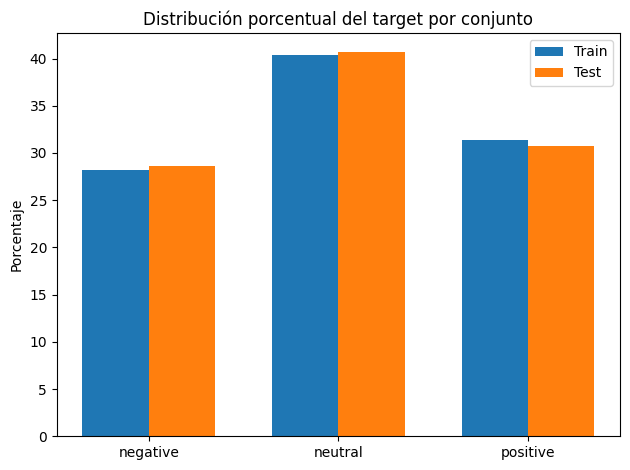

In [128]:
# Plotting the distribution of the target variable

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, train_dist, width, label='Train')
ax.bar(x + width/2, test_dist, width, label='Test')

ax.set_ylabel('Porcentaje')
ax.set_title('Distribución porcentual del target por conjunto')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


---

## ✅ Comentario de cierre

En este notebook realizamos el preprocesamiento completo de un dataset para análisis de sentimientos. Partimos desde la limpieza básica de datos nulos, continuamos con la tokenización personalizada que incorpora emojis y emoticones, y aplicamos técnicas de reducción del vocabulario como lematización y stemming. Además, implementamos una clase reutilizable para estructurar este flujo de trabajo de forma profesional.

La división en conjuntos de entrenamiento y prueba permitió visualizar la distribución del target (`sentiment`) y validar que, aunque las proporciones entre clases puedan diferir ligeramente, se mantiene el orden general esperado en ambos subconjuntos.

---

## ✅ Conclusiones

- Se logró construir un preprocesamiento robusto adaptado al lenguaje natural informal, incluyendo el manejo de emojis, lo cual es clave en análisis de redes sociales.
- Se observó que la lematización con `WordNetLemmatizer` funciona correctamente en inglés, por lo que se aclara su limitación en español.
- La tokenización personalizada con expresiones regulares garantiza una limpieza más específica que herramientas genéricas.
- La clase `NLPPreprocessor` permite escalar el análisis a múltiples datasets de manera consistente y ordenada.
- La distribución del target entre los sets de train y test mantiene el orden de frecuencia esperada, lo cual es una buena señal para continuar con el modelado.

> Próximo paso: Entrenar y evaluar modelos de clasificación para predecir el sentimiento a partir del texto procesado.

---
